In [1]:
import os
import datetime
import numpy as np
import pandas as pd

import omegaconf

import torch
import torch.nn as nn
from pytorch_lightning import Trainer

from AmbiSplice import visuals
from AmbiSplice import utils

import importlib
import run_ambisplice

/home/xqiu/anaconda3/envs/ambisplice/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/xqiu/anaconda3/envs/ambisplice/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened

In [5]:
torch.cuda.memory_stats()

OrderedDict([('active.all.allocated', 0),
             ('active.all.current', 0),
             ('active.all.freed', 0),
             ('active.all.peak', 0),
             ('active.large_pool.allocated', 0),
             ('active.large_pool.current', 0),
             ('active.large_pool.freed', 0),
             ('active.large_pool.peak', 0),
             ('active.small_pool.allocated', 0),
             ('active.small_pool.current', 0),
             ('active.small_pool.freed', 0),
             ('active.small_pool.peak', 0),
             ('active_bytes.all.allocated', 0),
             ('active_bytes.all.current', 0),
             ('active_bytes.all.freed', 0),
             ('active_bytes.all.peak', 0),
             ('active_bytes.large_pool.allocated', 0),
             ('active_bytes.large_pool.current', 0),
             ('active_bytes.large_pool.freed', 0),
             ('active_bytes.large_pool.peak', 0),
             ('active_bytes.small_pool.allocated', 0),
             ('active_bytes.

In [ ]:
importlib.reload(run_ambisplice.models)
importlib.reload(run_ambisplice.datasets)
importlib.reload(run_ambisplice.litmodule)
importlib.reload(run_ambisplice)

cfg_path = os.path.join(os.getcwd(), 'configs', 'train.yaml')
main_cfg = omegaconf.OmegaConf.load(cfg_path)

omegaconf.OmegaConf.set_struct(main_cfg, False)  # allow new attribute assignment

accelerator, devices = run_ambisplice.get_accelerator_devices(gpus=main_cfg.gpus)

torch_model = run_ambisplice.get_torch_model(main_cfg.model)

datasets = run_ambisplice.get_datasets(main_cfg.dataset)

lit_data = run_ambisplice.get_litdata(datasets, main_cfg.dataloader)

main_cfg.litrun.resume_from_ckpt = os.path.join(
    os.getcwd(), "checkpoints/PangolinSingle_2025-10-01_22-00-46_enonuk23/epoch=016-step=008500.ckpt")
    
lit_run = run_ambisplice.get_litrun(main_cfg.litrun, torch_model)

Available accelerator: cuda; devices: [0]


FileNotFoundError: [Errno 2] No such file or directory: 'rna_sites.pkl'

In [7]:
trainer = lit_run.fit(lit_data, accelerator=accelerator, devices=devices, save_cfg=main_cfg)

wandb: Currently logged in as: qiuresearch (qiulab) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/xqiu/anaconda3/envs/ambisplice/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /home/xqiu/bench/AmbiSplice/checkpoints/PangolinSingle_2025-10-06_20-08-33_9x9mjwrj exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type           | Params | Mode 
-------------------------------------------------
0 | model | PangolinSingle | 696 K  | train
-------------------------------------------------
696 K     Trainable params
0         Non-trainable params
696 K     Total params
2.787     Total estimated model params size (MB)
91        Modules in train mode
0         Modules in eval mode


Using CosineAnnealingWarmRestarts learning rate scheduler...
Sanity Checking: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


SystemExit: 1

/home/xqiu/anaconda3/envs/ambisplice/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
pred_outputs = lit_run.predict(datamodule=lit_data, save_prefix="pangolin")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/xqiu/anaconda3/envs/ambisplice/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Restoring states from the checkpoint path at /home/xqiu/bench/AmbiSplice/checkpoints/PangolinSingle_2025-10-01_22-00-46_enonuk23/

Predicting DataLoader 0:   0%|          | 0/43 [00:00<?, ?it/s]
Predict Step Input Variables:
Key                  Type                 Shape                     Dtype           Device          Requires Grad  
--------------------------------------------------------------------------------------------------------------
crop_start           Tensor               (256,)                    torch.int32     cuda:0          False          
crop_end             Tensor               (256,)                    torch.int32     cuda:0          False          
seq                  list                 -                         -               -               -              
seq_onehot           Tensor               (256, 4, 15000)           torch.float32   cuda:0          False          
cls                  Tensor               (256, 5000)               torch.int64     cuda:0          False          
cls_odds             Tensor               (256, 5000)               torch.float32   cuda:0         

In [4]:
eval_outputs = lit_run.evaluate(lit_data, save_prefix="pangolin")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/xqiu/anaconda3/envs/ambisplice/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Restoring states from the checkpoint path at /home/xqiu/bench/AmbiSplice/checkpoints/PangolinSingle_2025-10-01_22-00-46_enonuk23/

Predicting DataLoader 0:   0%|          | 0/43 [00:00<?, ?it/s]
Predict Step Input Variables:
Key                  Type                 Shape                     Dtype           Device          Requires Grad  
--------------------------------------------------------------------------------------------------------------
crop_start           Tensor               (256,)                    torch.int32     cuda:0          False          
crop_end             Tensor               (256,)                    torch.int32     cuda:0          False          
seq                  list                 -                         -               -               -              
seq_onehot           Tensor               (256, 4, 15000)           torch.float32   cuda:0          False          
cls                  Tensor               (256, 5000)               torch.int64     cuda:0          False          
cls_odds             Tensor               (256, 5000)               torch.float32   cuda:0         

In [ ]:
importlib.reload(run_ambisplice.models)
importlib.reload(run_ambisplice)
from AmbiSplice import loss_metrics
importlib.reload(loss_metrics)

batch_feats, preds = pred_outputs[3]

benchmark_metrics = loss_metrics.calc_benchmark(preds, batch_feats, keep_batchdim=True)
# cls_true = batch_feats['cls'].cpu().numpy()
# cls_pred = preds['cls_logits'].cpu().numpy().argmax(axis=-2)
# binarize cls_true and cls_pred
# cls_true_bin = (cls_true > 0).astype(int)
# cls_pred_bin = (cls_pred > 0).astype(int)

# topks_metrics, prcroc_metrics = loss_metrics.topks_roc_prc_metrics(cls_pred_bin, cls_true_bin, ks=(0.5, 1, 2, 4), multiples_of_true=True)
# topks_metrics
# prcroc_metrics
# save benchmark_metrics to a yaml file

benchmark_metrics


{'cls_precision': array([0.25      , 0.49586165, 0.25      , 0.25      , 0.25121042,
        0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.29116327, 0.25      , 0.5562225 , 0.25      ,
        0.25      , 0.25      , 0.45595917, 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.3908    , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.42964715, 0.25      ,
        0.4707011 , 0.38124666, 0.25      , 0.25004286, 0.33985537,
        0.30909187, 0.39860877, 0.40566432, 0.25012347, 0.25      ,
        0.25      , 0.25      , 0.34671032, 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.25      , 0.3582614 ,
        0.29679355, 0.37204725, 0.29362348, 0.30426198, 0.25      ,
        0.25      , 0.25      , 0.2824967 , 0.25      , 0.25      ,
        0.40130693, 0.25      , 0.4789205 , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.39879614, 0.25      ,
        0.25      , 0.33200905,

In [39]:
benchmark_df = pd.DataFrame(benchmark_metrics)
benchmark_df

,cls_precision,cls_recall,cls_f1,psi_mse,auprc,auroc
0,0.250000,0.249962,0.249981,1.919820e-08,-0.000000,NaN
1,0.495862,0.443015,0.464667,3.597513e-04,0.400787,0.682983
2,0.250000,0.249959,0.249980,9.293059e-09,-0.000000,NaN
3,0.250000,0.249975,0.249987,6.569402e-09,-0.000000,NaN
4,0.251210,0.250257,0.250381,1.757549e-08,0.000678,0.554833
...,...,...,...,...,...,...
251,0.319024,0.275352,0.287089,2.213500e-07,0.000565,0.458108
252,0.250000,0.249979,0.249989,1.686173e-10,-0.000000,NaN
253,0.530175,0.395921,0.441503,5.511111e-04,0.317738,0.660532
254,0.250000,0.249943,0.249971,4.881568e-07,-0.000000,NaN


In [33]:
type(float(benchmark_metrics['auprc']))

float

In [9]:
run_ambisplice.litmodule.summarize_tensors(batch_feats, prefix="preds")


preds Variables:
Key                  Type                 Shape                     Dtype           Device          Requires Grad  
--------------------------------------------------------------------------------------------------------------
crop_start           Tensor               (256,)                    torch.int32     cpu             False          
crop_end             Tensor               (256,)                    torch.int32     cpu             False          
seq                  list                 -                         -               -               -              
seq_onehot           Tensor               (256, 4, 15000)           torch.float32   cpu             False          
cls                  Tensor               (256, 5000)               torch.int64     cpu             False          
cls_odds             Tensor               (256, 5000)               torch.float32   cpu             False          
cls_mask             Tensor               (256, 5000)      

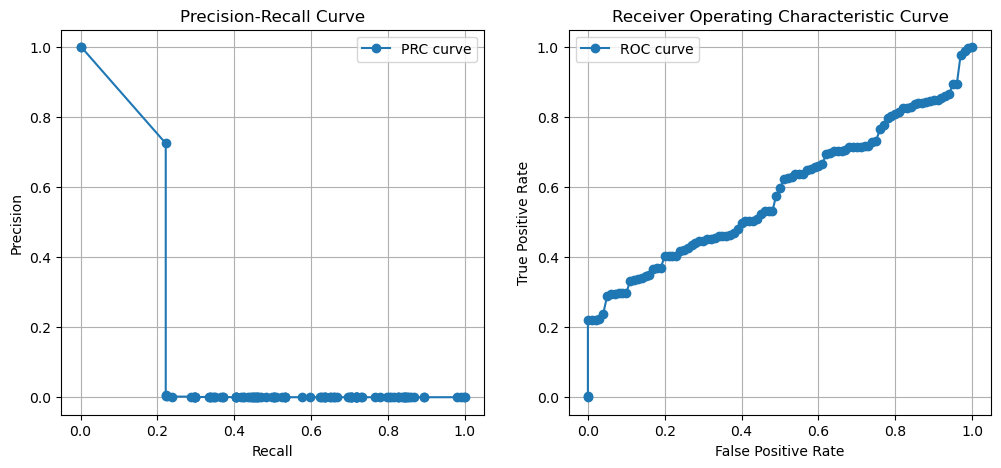

In [48]:
# use matplotlib to plot the prc and roc curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(benchmark_metrics['recall'], benchmark_metrics['precision'], marker='o', label='PRC curve')
plt.xlabel('Recall')    
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(benchmark_metrics['fpr'], benchmark_metrics['tpr'], marker='o', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid()
plt.legend()            
plt.show()

In [36]:
topks_metrics_df = pd.DataFrame(topks_metrics)
topks_metrics_df

,k,threshold,topk_accuracy,precision,recall,f1
0,252,0.0,0.365079,0.365079,0.18254,0.243386
1,504,0.0,0.182540,0.182540,0.18254,0.182540
2,1008,0.0,0.182540,0.091270,0.18254,0.121693
3,2016,0.0,0.182540,0.045635,0.18254,0.073016


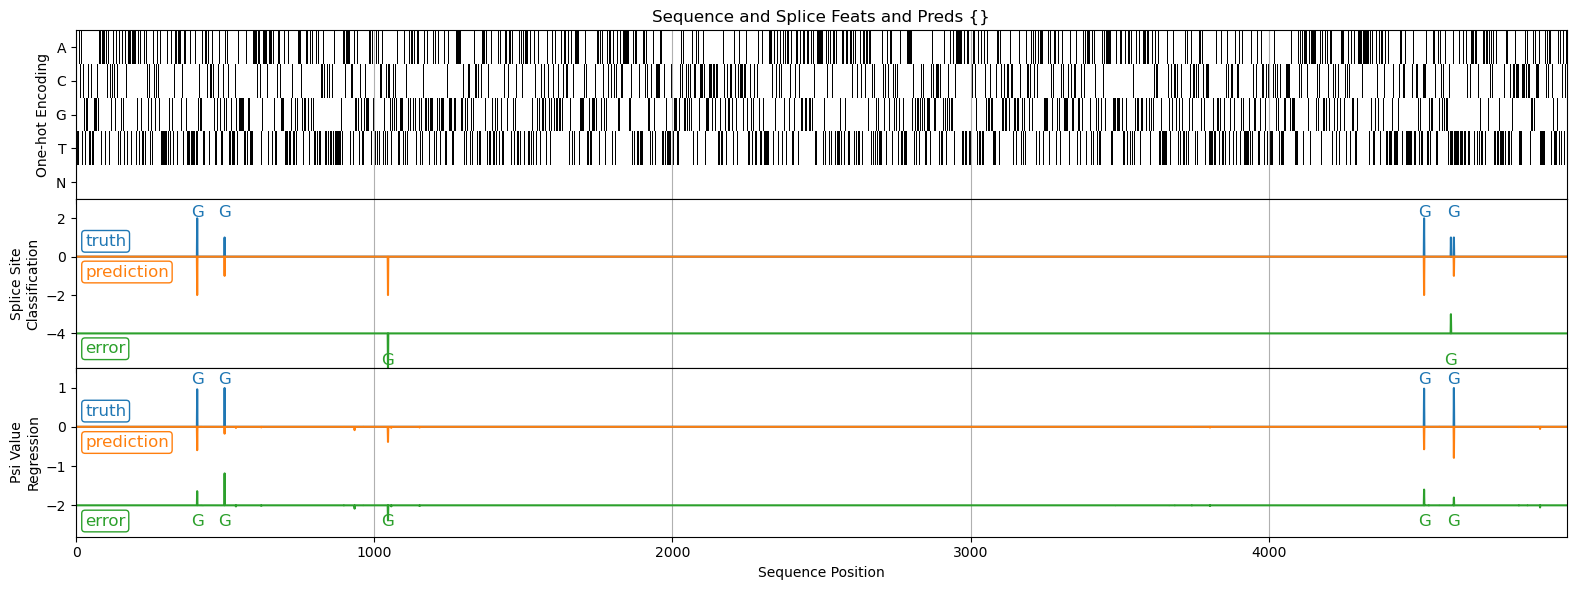

In [22]:
batch_feats, preds = pred_outputs[0]

import matplotlib.pyplot as plt

def feats_to_device(batch_feats, device, to_numpy=True):
    """ Move a batch of features to a specified device.
    Args:
        batch_feats: dict of batched features
        device: target device
    Returns:
        batch_feats: dict of features on the target device
    """
    new_feats = {}
    for k, v in batch_feats.items():
        if isinstance(v, torch.Tensor):
            new_feats[k] = v.to(device)
            if to_numpy:
                new_feats[k] = new_feats[k].numpy()
        elif not isinstance(v, torch.Tensor):
            new_feats[k] = v
    return new_feats

def plot_feats_and_preds(feats, preds, meta_dict={}):

    fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(16, 6))
    for ax in axes:
        ax.margins(y=0)
    # panel 1: onehot encoding of sequence
    seq_onehot = feats['seq_onehot'][:, 5000:10000]
    seq_onehot = np.concatenate([seq_onehot, 1 - seq_onehot.sum(axis=0, keepdims=True)], axis=0)
    axes[0].imshow(seq_onehot, aspect='auto', cmap='Greys', interpolation='nearest')
    axes[0].set_title(f'Sequence and Splice Feats and Preds {meta_dict}')
    axes[0].set_yticks([0, 1, 2, 3, 4])
    axes[0].set_yticklabels(['A', 'C', 'G', 'T', 'N'])
    axes[0].set_ylabel('One-hot Encoding')

    # panel 2: cls
    cls_label = feats['cls']
    cls_pred = preds['cls'].argmax(axis=0)
    cls_error = cls_label - cls_pred
    axlines = axes[1].plot(cls_label, label='true')
    axlines.extend(axes[1].plot(-cls_pred, label='pred'))
    axlines.extend(axes[1].plot(cls_error - 4, label='error'))

    seq = feats['seq'][5000:10000]
    correct_pos = np.where(np.logical_and(cls_error == 0, cls_label > 0))[0]
    for p in correct_pos:
        axes[1].text(p, 2.3, seq[p], fontsize=12, color=axlines[0].get_color(), ha='center', va='center')

    axes[1].text(30, 0.8, 'truth', fontsize=12, color=axlines[0].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[0].get_color(), boxstyle='round,pad=0.2'))
    axes[1].text(30, -0.8, 'prediction', fontsize=12, color=axlines[1].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[1].get_color(), boxstyle='round,pad=0.2'))
    axes[1].text(30, -4.8, 'error', fontsize=12, color=axlines[2].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[2].get_color(), boxstyle='round,pad=0.2'))                 
                 
    err_pos = np.where(np.abs(cls_error) >= 0.5)[0]
    for p in err_pos:
        axes[1].text(p, -5.4, seq[p], fontsize=12, color=axlines[2].get_color(), ha='center', va='center')
    axes[1].set_ylim(-5.8, 3)
    axes[1].set_ylabel('Splice Site\nClassification')

    # panel 3: psi
    psi_label = feats['psi']
    psi_pred = preds['psi']
    psi_error = psi_label - psi_pred
    axlines = axes[2].plot(psi_label, label='true')
    axlines.extend(axes[2].plot(-psi_pred, label='pred'))
    axlines.extend(axes[2].plot(psi_error - 2, label='error'))
    axes[2].set_ylim(-2.8, 1.2)

    psi_pos = np.where(psi_label > 0.05)[0]
    for p in psi_pos:
        axes[2].text(p, 1.2, seq[p], fontsize=12, color=axlines[0].get_color(), ha='center', va='center')

    err_pos = np.where(np.abs(psi_error) >= 0.1)[0]
    for p in err_pos:
        axes[2].text(p, -2.4, seq[p], fontsize=12, color=axlines[2].get_color(), ha='center', va='center')
    axes[2].set_ylim(-2.8, 1.5)
    axes[2].text(30, 0.4, 'truth', fontsize=12, color=axlines[0].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[0].get_color(), boxstyle='round,pad=0.2'))
    axes[2].text(30, -0.4, 'prediction', fontsize=12, color=axlines[1].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[1].get_color(), boxstyle='round,pad=0.2'))
    axes[2].text(30, -2.4, 'error', fontsize=12, color=axlines[2].get_color(), ha='left', va='center'
                 , bbox=dict(facecolor='none', edgecolor=axlines[2].get_color(), boxstyle='round,pad=0.2'))       
    
    
    axes[2].set_xlabel('Sequence Position')
    axes[2].set_ylabel('Psi Value\nRegression')

    axes[0].grid(axis='x')
    axes[1].grid(axis='x')
    axes[2].grid(axis='x')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.show()


for i in range(len(batch_feats['cls'])):
    i = np.random.randint(len(batch_feats['cls']))
    cls_label = batch_feats['cls'][i].cpu().numpy()
    psi_label = batch_feats['psi'][i].cpu().numpy()
    if cls_label.sum() == 0 or psi_label.sum() <= 0.1:
        continue
    sample_feats = {k: v[i] for k, v in feats_to_device(batch_feats, device='cpu').items()}
    sample_preds = {k: v[i] for k, v in feats_to_device(preds, device='cpu').items()}
    plot_feats_and_preds(sample_feats, sample_preds)
    break


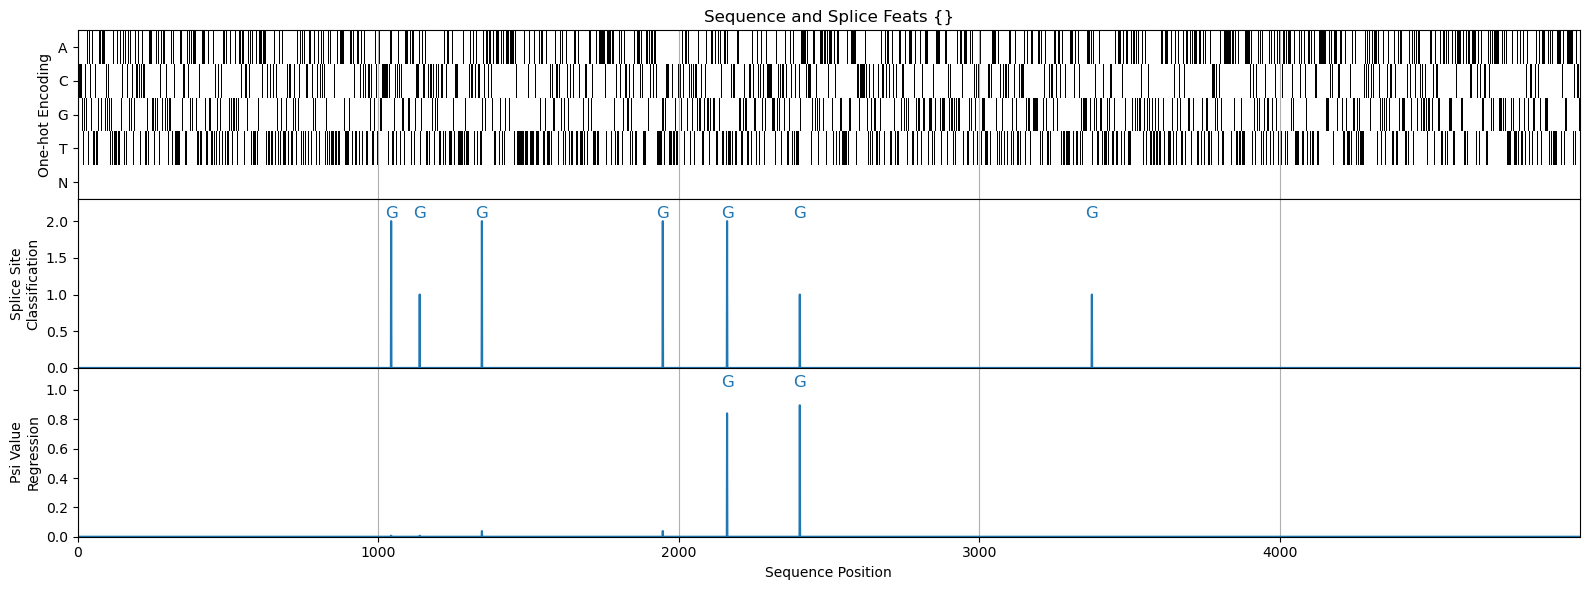

{'crop_start': np.int32(15000), 'crop_end': np.int32(20000), 'seq': 'AAAGGATTCCAGGCTTGGTCTCAACTCCAAATGGTAGGTGTCAAACTACTTTTATTCTATCAGGGAAGAGATCACATATCCCAGCAGGGTCATACACATTCTAGTGGGTGACACACTAGCCAGGACAAATGCTTGACTCTGCGGAGGTAGGGGGCCGGGGGGTGTCAGTGTGCAGAAATAGTGGAATATTGCCTGTTTGCAAATGCGCAAGGGTACTTTTTAATGGCTAAATTCCAGATAATTCTTAAGGACATTTCAAAATGATTGGAATAATTAGTTTTGATTTGAGATAAGCAGATTAAACAAATAACATGTTTGAAGGGCAAATCAATTTCCAATGCCTTTCTCTGCTTTTCAGTCATCCAAGCAAAAATTTTTGCTTTTATTTATTTTGGTCCAGGGAGAGGAAATCTGGCATGTCCTGCTTGCTTTCTATAAACCTTCTTTCAACATTTGTTGGTAAAATAGATCCTTTTGGAAGATTCTCTGCATTTGTTCTGGTTTGGCTTAGATGGGTAGGATGCTTTATATAAAGCATAACAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTTTGTGTGTATTCTTTTTCTACTTTATGTACTTTAGCTGGAAAGATCCTTTTATTCCTGAACTTTACTTCTCACTTAAAAATTCTTGACAATGGGTAAAAATGGATTCTATTAATATACAATTGAAAGTCATATTACAAATCTTAGTATCTTGCTGTTCAGAATGACAATCTTTTAATAGGGATTTAGGGAAATGTACGTGGAAGCATTTAGAGTCCTCTCAGATTTGTTTATCCTGTTATAGCTCAACTATCCAAGGCTATCAAAGAGACTACGGGAGGCTGAGAGCTCAGAACCTTTTCCTGGGGTGCTAATTAATTCCCCACAGGGCTCTTTATTTGTGGTCAGTTGCA

In [244]:
for i in range(len(batch_feats['cls'])):
    i = np.random.randint(len(batch_feats['cls']))
    cls_label = batch_feats['cls'][i]
    psi_label = batch_feats['psi'][i]
    if cls_label.sum() < 4 or psi_label.sum() <= 0.1:
        continue
    sample_feats = {k: v[i] for k, v in feats_to_device(batch_feats, device='cpu').items()}
    plot_feats(sample_feats)
    print(sample_feats)
    break


In [ ]:
from AmbiSplice import datasets
importlib.reload(datasets.splice_feats)
importlib.reload(datasets)

pangolin_ds = datasets.PangolinDataset('/home/xqiu/github/Pangolin_train/preprocessing/dataset_train_all.h5')

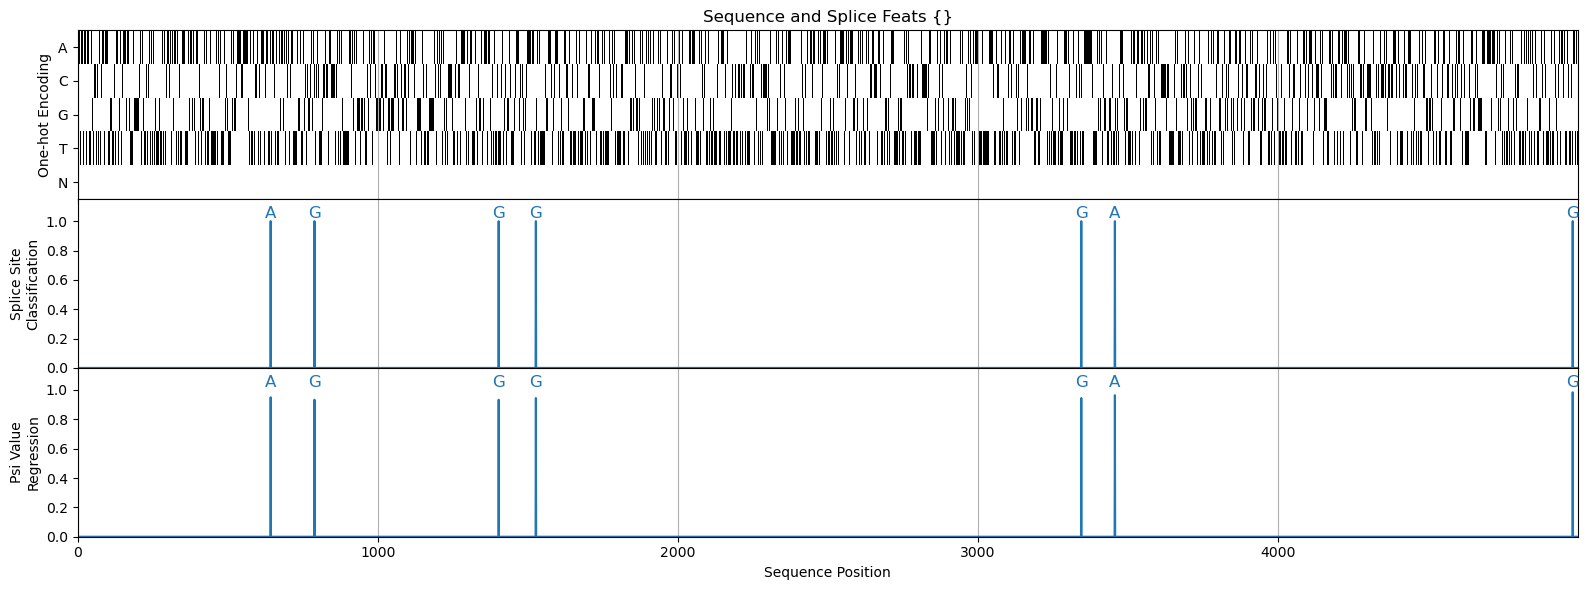

In [21]:
def plot_feats(feats, meta_dict={}):

    fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(16, 6))
    for ax in axes:
        ax.margins(y=0)
    # panel 1: onehot encoding of sequence
    seq_onehot = feats['seq_onehot'][:, 5000:10000]
    seq_onehot = np.concatenate([seq_onehot, 1 - seq_onehot.sum(axis=0, keepdims=True)], axis=0)
    axes[0].imshow(seq_onehot, aspect='auto', cmap='Greys', interpolation='nearest')
    axes[0].set_title(f'Sequence and Splice Feats {meta_dict}')
    axes[0].set_yticks([0, 1, 2, 3, 4])
    axes[0].set_yticklabels(['A', 'C', 'G', 'T', 'N'])
    axes[0].set_ylabel('One-hot Encoding')

    # panel 2: cls
    cls_label = feats['cls']
    axlines = axes[1].plot(cls_label, label='true')

    cls_max = max([1, cls_label.max()])

    seq = feats['seq'][5000:10000]
    for p in np.where(cls_label > 0)[0]:
        axes[1].text(p, cls_max * 1.05, seq[p], fontsize=12, color=axlines[0].get_color(), ha='center', va='center')

    axes[1].set_ylim(0, cls_max * 1.15)
    axes[1].set_ylabel('Splice Site\nClassification')

    # panel 3: psi
    psi_label = feats['psi']
    axlines = axes[2].plot(psi_label, label='true')
    axes[2].set_ylim(-2.8, 1.2)

    psi_pos = np.where(psi_label > 0.05)[0]
    for p in psi_pos:
        axes[2].text(p, 1.05, seq[p], fontsize=12, color=axlines[0].get_color(), ha='center', va='center')

    axes[2].set_ylim(0, 1.15)
    
    axes[2].set_xlabel('Sequence Position')
    axes[2].set_ylabel('Psi Value\nRegression')

    axes[0].grid(axis='x')
    axes[1].grid(axis='x')
    axes[2].grid(axis='x')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.show()

for i in range(len(pangolin_ds)):
    pangolin_feats = pangolin_ds[np.random.randint(len(pangolin_ds))]
    if pangolin_feats['cls'].sum() < 4 or pangolin_feats['psi'].sum() <= 0.1:
        continue
    plot_feats(pangolin_feats)
    break

In [ ]:
#Load the Pretrained Model
og_model = model.Pangolin(L=L, W=W, AR=AR)
state_dict = torch.load("Model/final.5.7.3", map_location=accelerator, weights_only=True)
og_model.load_state_dict(state_dict)

# Move model to GPU################
og_model.to(accelerator)
###################################
# ⛳ CRITICAL: Check device of model weights
print("Model device:", next(og_model.parameters()).device)

Model device: cuda:0


In [ ]:
# Load preprocessed training data
training_data_path = "2027_training_data_sequece_exp.pt"  #"102_training_data_sequece_exp.pt"
data = torch.load(training_data_path, weights_only=True)
training_input =  torch.stack(data['X'])  # Each: [N, 4, 15000] # Input:
training_label = torch.stack(data['y'])  # Each: [N, 12, 5000] # Label:

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
input_data = training_input.to(accelerator)
#og_output = og_model(input_data)

### training_label vs predicted visual

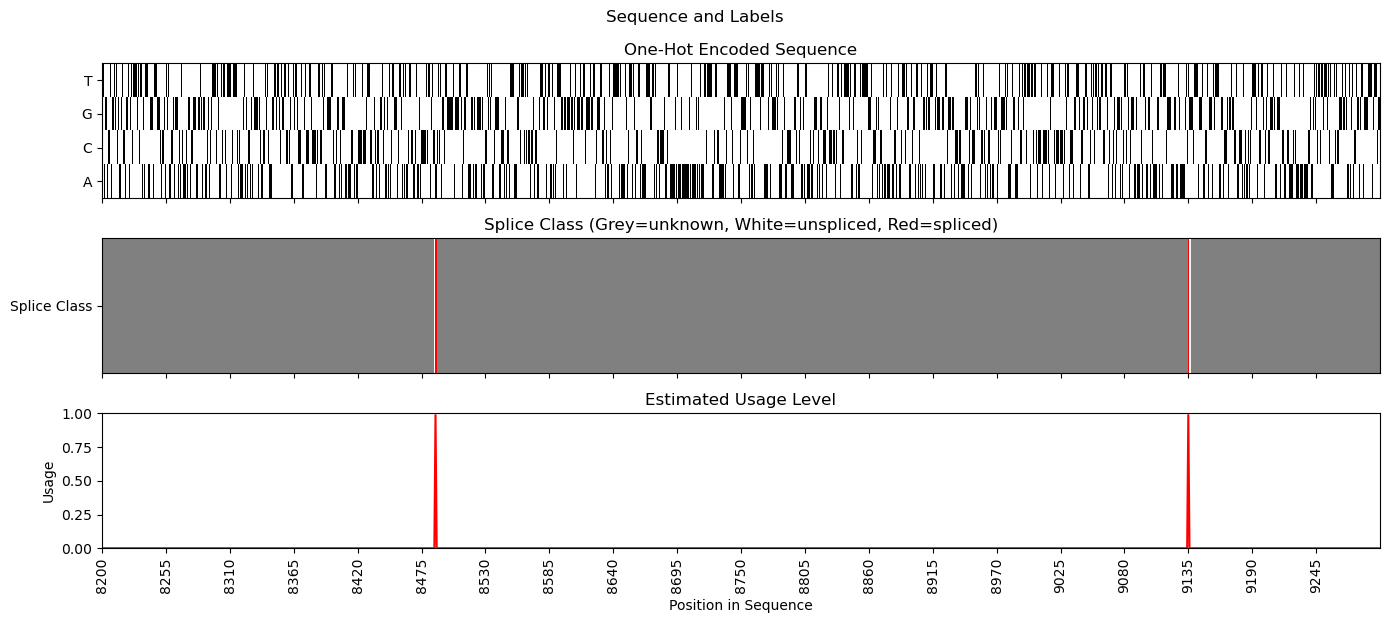

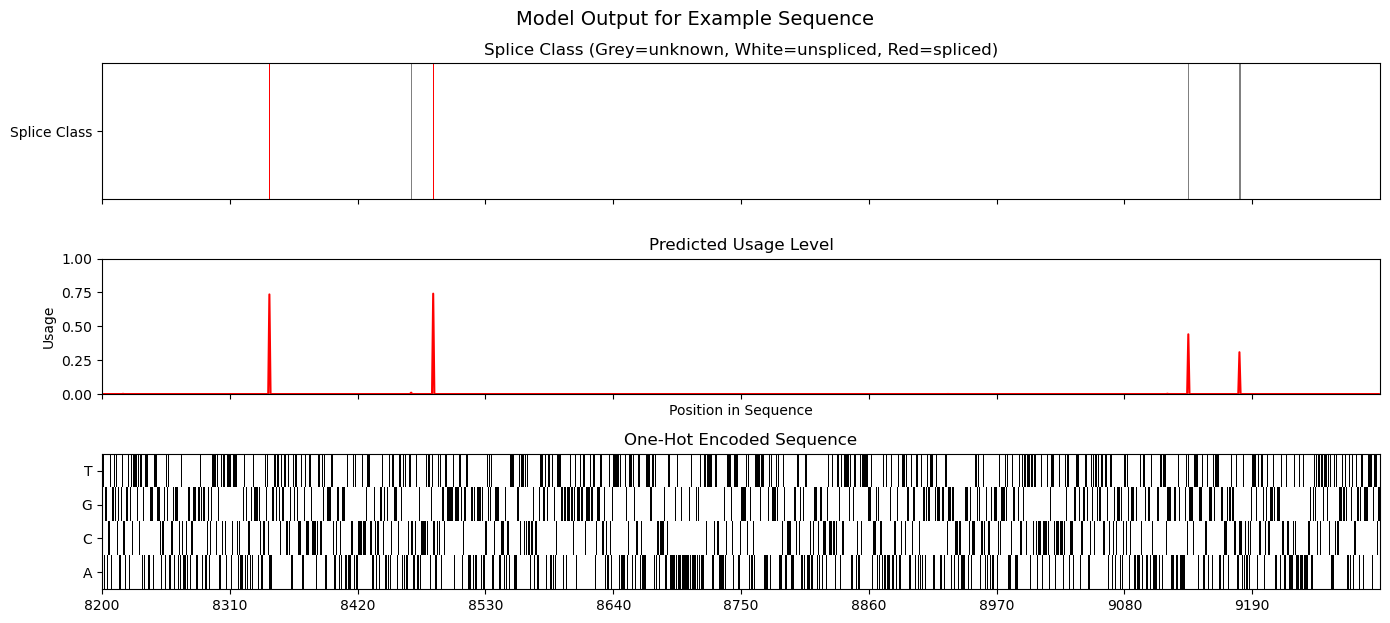

In [21]:
cor_start = 8200
cor_end = 9300
plot_one_hot_and_labels_zoom(training_input[0], training_label[0], zoom_start=cor_start, zoom_end=cor_end, title="Sequence and Labels")

plot_one_hot_and_predictions_zoom(
    one_hot_array=training_input[0], 
    prediction_array=og_output[0].detach().cpu()[0:3, :], 
    zoom_start=cor_start, zoom_end=cor_end,
    title="Model Output for Example Sequence"
)

## Training Module

In [ ]:
#import torch
#import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F

# ----- Example Model (Pangolin-style CNN) -----
class PangolinLikeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 64, kernel_size=7, padding=3)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.out = nn.Conv1d(64, 3, kernel_size=1)  # Output: 3 channels (unspliced, spliced, usage)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.out(x)  # shape: (batch, 3, 15000)
        x = x.permute(0, 2, 1)  # → (batch, 15000, 3)
        return x


training_input = training_input[:, 0:4, :].to(accelerator)

# For [N, C, L] the padding is (0, 0) on last dim (L), and (0, 9) on channels (C)
training_label_padded = F.pad(training_label, pad=(0, 0, 0, 9))  # shape becomes [105, 12, 15000]
training_label_corped = training_label_padded[:, :, 5000:10000]

dataset = TensorDataset(training_input, training_label_corped)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# ----- Setup -----
accelerator = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.Pangolin(L=L, W=W, AR=AR).to(accelerator)
#model = PangolinEXP(L=L, W=W, AR=AR).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# ----- Training Loop -----
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(accelerator), batch_y.to(accelerator)

        optimizer.zero_grad()
        pred = model(batch_X)  # shape: (batch, 15000, 3)
        loss = loss_fn(pred, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader):.4f}")

Epoch 1/100, Loss: 0.2511
Epoch 2/100, Loss: 0.1980
Epoch 3/100, Loss: 0.1845
Epoch 4/100, Loss: 0.1788
Epoch 5/100, Loss: 0.1758
Epoch 6/100, Loss: 0.1737
Epoch 7/100, Loss: 0.1721
Epoch 8/100, Loss: 0.1710
Epoch 9/100, Loss: 0.1701
Epoch 10/100, Loss: 0.1695
Epoch 11/100, Loss: 0.1690
Epoch 12/100, Loss: 0.1686
Epoch 13/100, Loss: 0.1683
Epoch 14/100, Loss: 0.1681
Epoch 15/100, Loss: 0.1679
Epoch 16/100, Loss: 0.1678
Epoch 17/100, Loss: 0.1676
Epoch 18/100, Loss: 0.1676
Epoch 19/100, Loss: 0.1675
Epoch 20/100, Loss: 0.1674
Epoch 21/100, Loss: 0.1673
Epoch 22/100, Loss: 0.1673
Epoch 23/100, Loss: 0.1672
Epoch 24/100, Loss: 0.1672
Epoch 25/100, Loss: 0.1672
Epoch 26/100, Loss: 0.1671
Epoch 27/100, Loss: 0.1671
Epoch 28/100, Loss: 0.1671
Epoch 29/100, Loss: 0.1671
Epoch 30/100, Loss: 0.1670
Epoch 31/100, Loss: 0.1670
Epoch 32/100, Loss: 0.1670
Epoch 33/100, Loss: 0.1670
Epoch 34/100, Loss: 0.1670
Epoch 35/100, Loss: 0.1670
Epoch 36/100, Loss: 0.1669
Epoch 37/100, Loss: 0.1669
Epoch 38/1

In [6]:
# ----- Save Model -----
torch.save(model.state_dict(), "Model/2027_sequence_model.pt")
#torch.save(model.state_dict(), "102_samples_sequence_exp_model.pt") #"102_samples_sequence_exp_model.pt")

## Testing on trained model

In [ ]:
#model_demo = PangolinLikeModel()  
model_demo = Pangolin(L=L, W=W, AR=AR)
#Load the Pretrained Model
state_dict = torch.load("demo_pangolin_same_model.pt", map_location=accelerator, weights_only=True)
model_demo.load_state_dict(state_dict)

# Move model to GPU################
model_demo.to(accelerator)
###################################
# ⛳ CRITICAL: Check device of model weights
print("Model device:", next(model_demo.parameters()).device)

/tmp/ipykernel_65901/2115600752.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("demo_pangolin_same_model.pt", map_location=device)


Model device: cuda:0


In [ ]:
input_data = training_input.to(accelerator)
output_demo = model_demo(input_data)

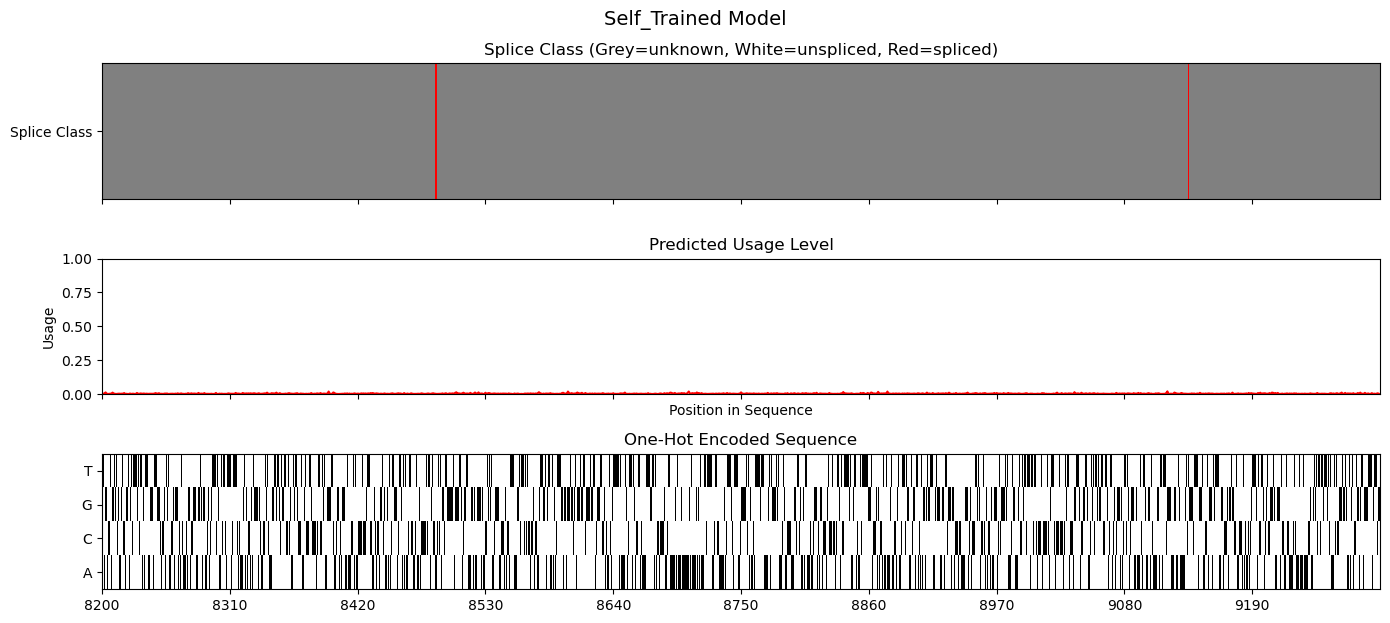

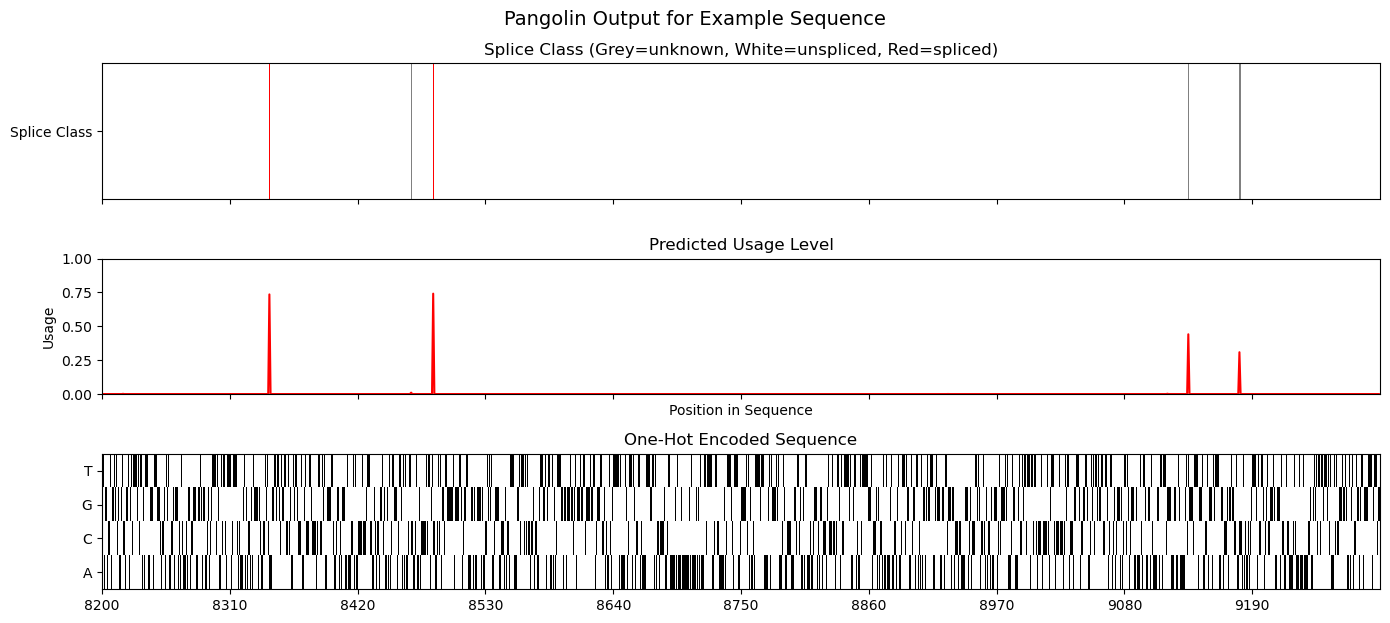

In [22]:
cor_start = 8200
cor_end = 9300

plot_one_hot_and_predictions_zoom(
    one_hot_array=training_input[0], 
    prediction_array=output_demo[0].detach().cpu()[0:3,:], 
    zoom_start=cor_start, zoom_end=cor_end,
    title="Self_Trained Model"
)

plot_one_hot_and_predictions_zoom(
    one_hot_array=training_input[0],   
    prediction_array=og_output[0].detach().cpu()[0:3, :], 
    zoom_start=cor_start, zoom_end=cor_end,
    title="Pangolin Output for Example Sequence"
)

In [16]:
output_demo_0 = output_demo[0].detach().cpu().numpy().T[:, 0:12]
output_demo_0_0 = output_demo_0[:, 0]
output_demo_0_1 = output_demo_0[:, 1]
output_demo_0_2 = output_demo_0[:, 2]

In [21]:
#max(output_demo_0_1)
#max(output_demo_0_2)